In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


In [ ]:
MAD

In [10]:
def filter_extreme_MAD(series,n): 
    median = series.quantile(0.5)
    new_median = ((series - median).abs()).quantile(0.50)
    max_range = median + n*new_median
    min_range = median - n*new_median 
    return np.clip(series,min_range,max_range) 

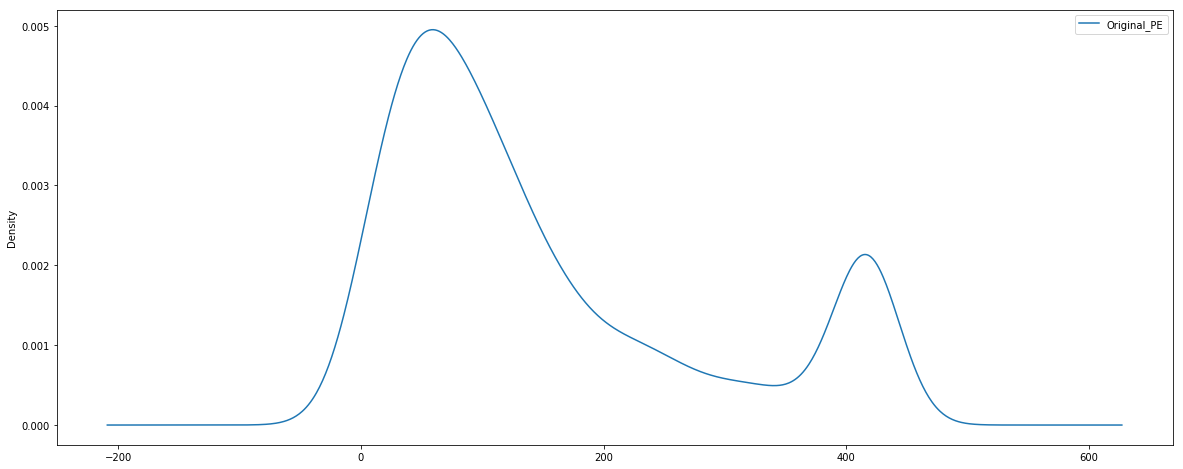

In [19]:
df = pd.read_csv('../Documents/train_data.csv')
df.head(n=5)
data = filter_extreme_MAD(df['存货周转天数(天)_mean'],5)
fig = plt.figure(figsize = (20, 8))
ax = data.plot.kde(label = 'Original_PE')
ax.legend() 

# 3σ

In [33]:
def filter_extreme_3sigma(series,n=3):
    mean = series.mean()
    std = series.std()
    max_range = mean + n*std
    min_range = mean - n*std
    return np.clip(series,min_range,max_range)

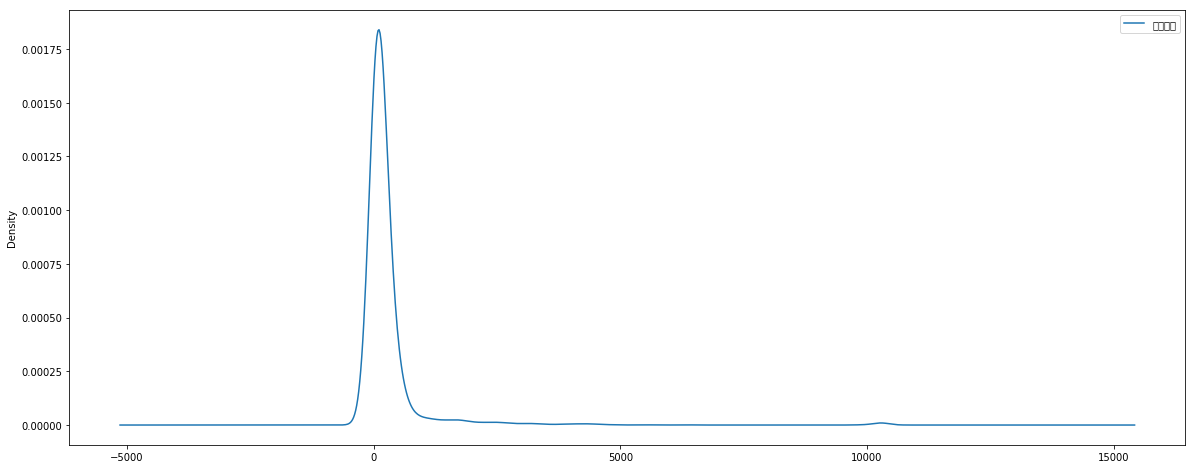

In [35]:
data1 = filter_extreme_3sigma(df['存货周转天数(天)_mean'])
fig = plt.figure(figsize = (20, 8))
ax = data1.plot.kde(label = '周转天数')
ax.legend() 

In [37]:
def filter_extreme_percentile(series,min = 0.10,max = 0.90):
    series = series.sort_values()
    q = series.quantile([min,max])
    return np.clip(series,q.iloc[0],q.iloc[1])



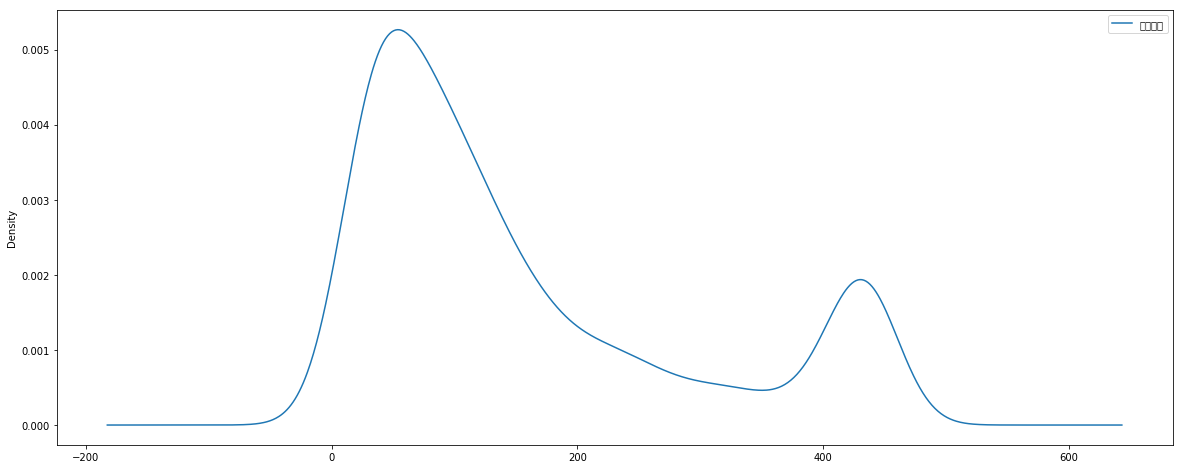

In [38]:
data2 = filter_extreme_percentile(df['存货周转天数(天)_mean'])
fig = plt.figure(figsize = (20, 8))
ax = data2.plot.kde(label = '周转天数')
ax.legend() 

In [44]:
def standardize_series(series):
    std = series.std()
    mean = series.mean()
    return (series-mean)/std
data3 =  standardize_series(data1)



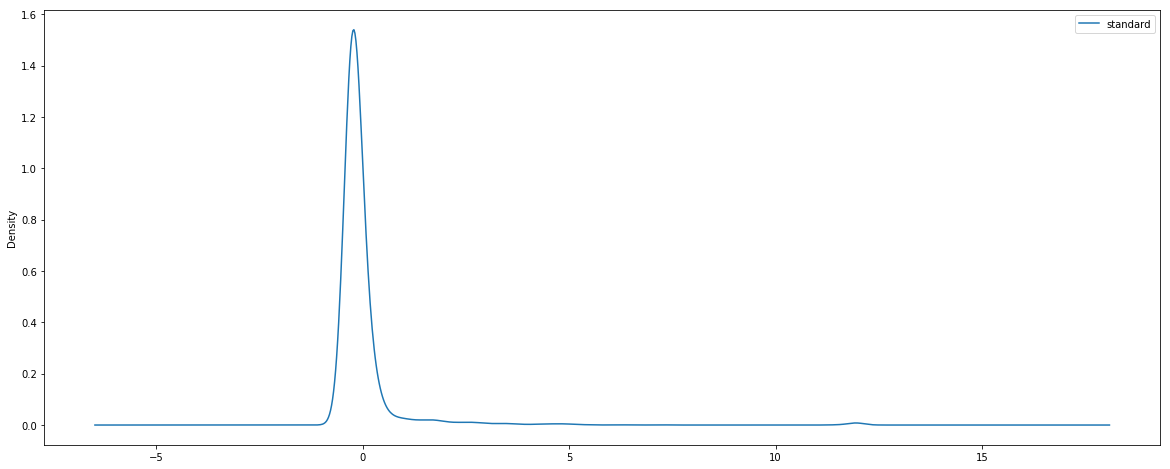

In [48]:
fig = plt.figure(figsize = (20, 8))
ax = data3.plot.kde(label = 'standard')
ax.legend() 


# 中性化

In [53]:
import jqdatasdk

In [54]:
jqdatasdk.get_price("000001.XSHE")

run jqdatasdk.auth first


In [55]:
jqdatasdk.auth(“18669077193”, “19921023zx”)

SyntaxError: invalid character in identifier (<ipython-input-55-e1c0f62453a8>, line 1)

In [57]:
jqdatasdk.auth("19987830481","830481")

auth success （JQData现有流量增加活动，详情请咨询JQData管理员，微信号：JQData01）


In [68]:
import pandas as pd
from jqdata import *
from jqfactor import Factor
from jqlib.optimizer import *

ModuleNotFoundError: No module named 'jqdata'

In [62]:
def market_open(context):
    security = g.security
    close_data = attribute_history(security, 5, '1d', ['close'])
    MA5 = close_data['close'].mean()
    current_price = close_data['close'][-1]
    cash = context.portfolio.available_cash
    if current_price > 1.01*MA5:
        order_value(security, cash)
        log.info("Buying %s" % (security))
    elif current_price < MA5 and context.portfolio.positions[security].closeable_amount > 0:
        order_target(security, 0)
        log.info("Selling %s" % (security))
    record(stock_price=current_price)

In [67]:
initialize()
    

TypeError: initialize() missing 1 required positional argument: 'context'

NameError: name 'context' is not defined